# El modelo probabilista de Nagel-Schreckenberg (NaSch)

Los módelos de tránsito vehicular empezaron a trabajarse desde la primera mitad del siglo XX, sin embargo fue hasta 1992 en el que el modelo de NaSch obtuvo resultados interesantes que pudieron ser comparados con datos empíricos de las carreteras alemanas [7] (para revisión de otros modelos, consultar [2]). 

El modelo de NaSch es en escencia un autómata celular con reglas de transición bien definidas con las cuales obtenemos un proceso estocástico (no determinista) que modelan una carretera de 1 carril. 

Aquellos modelos basados en autómatas celulares pueden ser clasificados de acuerdo a sus condiciones de frontera y a su dinámica. Las dos condiciones de frontera más frecuentes son las *periódicas* y las *abiertas*. 

las fronteras periódicas, en nuestro contexto, equivaldrían a un circuito de carrera de un carril en el cual la densidad $\rho$ quedaría constante a lo largo de la simulación (tal y como en una carrera, si suponemos que no hay accidentes). Las fronteras abiertas serían equivalentes a tomar un trozo de carretera y analizarlo. Cada uno de estos dos casos resulta en fenómenos distintos tal cual se ha visto en el capítul anterior.

Si bien ya hemos introducido y hablado un poco de las reglas de transición, es necesario hablar también de *la manera en la que se aplican*. Por un lado podemos tener una dinámica *secuencial* en la que las reglas son aplicadas en un cierto orden. Por otro lado, una dinámica *paralela* obedece a la aplicación conjunta de las reglas de transición.

Nosotros trabajaremos con una dinámica secuencial. Esto debido al tipo de modelo "car following" el cual se describió en el capítulo anterior y que será descrito a detalle más adelante. Sin embargo, antes de continuar es importante mencionar que una dinámica secuencial, las reglas de transición **no** son conmutativas, y el hecho de realizar esta acción llevará a un modelo distinto. El orden que sigan las reglas puede referirse a las medidas de seguridad para impedir que los vehículos colisionen o al tipo de programa que se quiera escribir. En todo caso, se puede pensar que las reglas de transición dan las condiciones a cada tiempo $t$. El cambiar el orden cambiaría las condiciones, y por lo tanto el desarrollo de la simulación.

En el modelo de NaSch consideramos un arreglo *unidimensional* conformado de $L$ celdas. Cada una de ellas tiene una longitud típica ([4], [5], [7]) $\Delta x = 7.5m$. Esta distancia corresponde a la longitud ocupada por un coche más un cierto espacio de seguridad entre este y los coches precedentes y procedentes.

Cada coche puede ser caracterizado por su posición y su velocidad $(x(t), v(t))$. La posición de un coche está dada por el número de celda $i$ en la cual se encuentre tal que $i = 0,\dotsc, L$.

La velocidad será también discreta y tomará los valores $v = 0,\dotsc, v_{max}$, donde $v_{max}$ es la velocidad máxima que un coche puede alcanzar. En este momento, para simplificar las cosas supondremos que todos los coches están sujetos a este tope de velocidad. Sin embargo más adelante tendremos dos distintos tipos de coches, i.e. dos velocidades máximas.

El modelo de NaSch define $v_{max}= 5$, a partir de lo cual argumenta que el paso de tiempo en sus simulaciones númericas corresponde a 1 segundo [7]. Nos basaremos en los mismos argumentos para poder decir que la aseveración es cierta.

Tomando en cuenta que $\Delta x = 7.5m$ y que $\Delta t = 1 s$ obtenemos entoncesque $v = 1 celda\big/paso \ de \ tiempo = 7.5m \ s^{-1} = 27km \ h^{-1}$. De esta manera, $v_{max}=5=135km \ h^{-1}$.

Como nota, puesto que $\Delta t=1$, a lo largo del texto (y en otros textos) no será extraño encontrar expresiones tales como $v<d$ en lugar de $v<d/\Delta t$ para una distancia $d$.

## Reglas de transición

Antes de presentar las reglas tendremos que definir la distancia entre dos coches. Esta distancia será muy útil no sólo para el caso unidimensional, sino también a la hora de extender el modelo a distintos carriles en los cuales un coche pueda cambiar de uno a otro. 

Si $x_i$ es la posición de un cierto coche y $x_p$ es la posición del vehículo de adelante a un cierto tiempo $t$, entonces la distancia que los separa (i.e. el número de celdas vacías entre uno y el otro) es $d_i := x_p-x_i-1$.

Veamos ahora las reglas de transición de estado para cada paso de tiempo. Estas son aplicadas en el tiempo $t$ antes de pasar al tiempo $t+1$. Estas reglas son escritas según [4] y [5] por considerar una descripción adecuada y simple.

+ **R1**: Aceleración
 
 Si $v_i < v_{max}$, entonces la velocidad del vehículo $i$ se incrementa en uno.
    $$v_i \to min(v_i+1, v_{max})$$
    
+ **R2**: Desaceleración

 Si $d_i<v_i$ entonces la velocidad del vehículo $i$ se reduce a $d_i$.
 $$v_i \to min(v_i, d_i)$$
 
+ **R3:** Ruido o frenado aleatorio

 Si el vehículo está en movimiento ($v_i>0$), la velocidad de este se reduce una unidad con probabilidad $R$.
 $$ v_i \to max(v_i-1, 0) \ con \ probabilidad \ R$$ 
 
+ **R4:** Movimiento del vehículo

 El vehículo se mueve hacia adelanta con la velocidad resultante de los pasos 1-3.
 $$ x_i \to x_i+v_i$$
 
Aquí es importante hacer notar que las tres primeras reglas son en realidad el *núcleo* de nuestro modelo. La regla 4 es únciamente aplicar los cambios a nuestra carretera.

La regla 1 o aceleración nos asegura una de las premisas en las que se basan los modelos de tránsito vehicular la cual es que todos los vehículos quieren ir a la velocidad máxima permitida (por quién, es otro asunto). La segunda regla o desaceleración nos asegura la otra premisa la cual dice que los conductores no quieren impacatarse con cualquier otro vehículo. 

La regla 3 o frenado aleatorio/ruido es de suma importancia en el modelo debido a que es ella quien nos da la cualidad *estocástica* de nuestro modelo y lo vuelve *no determinista*. En esta regla vienen todos aquellos eventos imprevistos que pueden ocurrir al conducir. Desde una pequeña distracción del conductor hasta una gaviota estrellándose en el parabrisas pasando por un alce cruzando la carretera, estos imprevistos provocan un frenado por parte del conductor y son potenciales causas de congestiones espontáneas.

Es importante recordar en este punto que las reglas no conmutan. Esto se puede demostrar sencillamente pensando en que las reglas 1-3 nos dan las "condiciones iniciales" del tiempo $t$. Al conmutar las reglas no obtendríamos las mismas condiciones, provocando un desarrollo distinto de nuestra carretera para cada conmutación. 

A continuación dejamos una pequeña simulación para que el lector pueda divertirse. Se simula una carretera de $N$ celdas en la cual los vehículos siguen las reglas descritas anteriormente. El lector puede jugar con la probabilidad $R$, la longitud $N$ y el tiempo total de la simulación $T_f$. La carretera será dividida en 20 secciones sin importar la longitud. Por el momento sólo se puede observar el diagrama espacio-temporal con condiciones de fronteras abiertas. Sin embargo se está trabajando para que también se pueda observar el diagrama fundamenta y con la opción de poner fronteras periódicas.

In [1]:
# Correr primero esta celda para importar los paquetes necesarios.
# Esto se logra haciendo Shift+Enter
# La importación debe de hacerse para cualquier simulación en este notebook
# sólo es necesario importarla una vez

using Modelos

# El paquete Modelos puede ser revisado en mi perfil de GitHub

INFO: Loading help data...


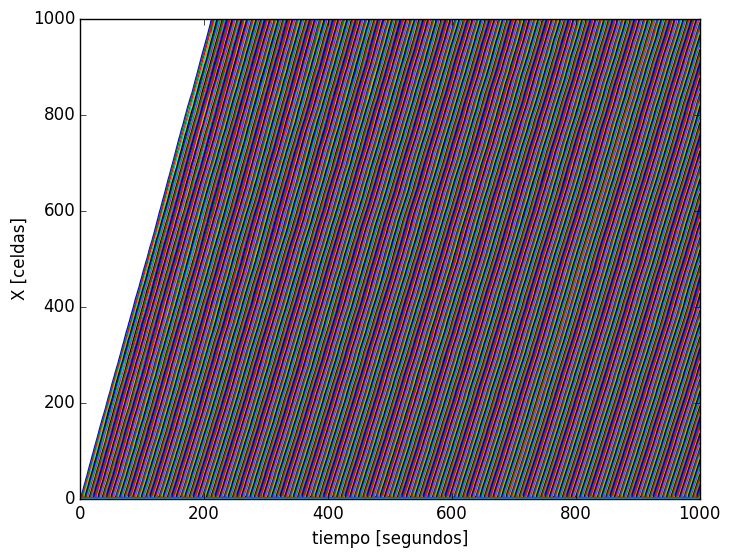

PyObject <matplotlib.text.Text object at 0x115a2b410>

In [4]:
# Se muestra una pequeña simulación la cual se lleva a cabo via la función Modelo_NaSch
# Esta función acepta distintos argumentos. El primero es R tal que 0. ≤ R ≤ 1.
# El segundo es la longitud de la carretera. Sólo se aceptan enteros
# El tercero es el tiempo total. Sólo se aceptan enteros
# También hay dos argumentos extras, xlim e ylim los cuales son duplas
# y denotan los limites del diagrama dibujado

R = 0.2; N = 1000; Tf = 1000
Modelo_NaSch(R, N, Tf)

El modelo de NaSch tiene un gran número de ventajas. Dentro de ellas destaca el hecho de que es minimal, en el sentido en que las cuatro reglas que lo conforman bastan para generar la dinámica. La simulación anterior es un gran ejemplo de esto ya que al realizar el diagrama fundamental y aquel espacio-temporal reconocemos todos aquellos elementos de una dinámica de tránsito vehicular (de hecho, el poder reproducir los diagramas mencionados son un requisito para los modelos que usaremos como base).

Sin embargo, para poder adaptar los resultados que arrojan las simulaciones basadas en este modelo tendremos que agregar algunos parámetros o reglas extras. Uno de estos parámetros se relaciona con las medidas de seguridad que cualquier conductor sensato tiene que seguir al conducir un vehículo. Estas medidas serán tratadas en la siguiente sección.

# Modelo con anticipación y medidas de seguridad

Las reglas y su orden esconden comportamientos que no son percibidos a primera vista. Dentro de todos estos, pondremos especial atención a aquel derivado del siguiente ejemplo.

Supongamos una carretera discreta en la cual tenemos dos coches en las celdas $i=3$ e $i=4$ con velocidades $v_4=5$ y $v_4=5$ respectivamente al tiempo $t$. Suponemos que la regla de aceleración ya fue aplicada y que el frenado aleatorio no aplicará para estos dos coches, de tal modo que únicamente falta desacelerar. 

Según la regla de desaceleración del modelo de NaSch, $v_1=5 \to 0$ y $v_4 = 5 \to 5$ (suponemos que estos son los únicos dos coches en la carretera), por lo que al aplicar R4 el vehículo de atrás **no** se movería a diferencia del vehículo de adelante que llegaría hasta la celda $i=9$, dejando ahora un espacio de 5 celdas vacías entre los dos coches. Aún más, el vehículo de atrás se convierte ahora en un obstáculo y provoca que todos los coches que pudieran venir atrás de él frenen disminuyendo así la velocidad promedio y por lo tanto disminuyendo el flujo. En la realidad esta situación pudo haberse desarrollado de otra manera. El conductor de atrás podría no frenar completamente, sino frenar lo suficiente para que a la hora de moverse hubiera una distancia "segura" entre ellos, como por ejemplo 1 o 2 celdas. 

Este ejemplo podría parecer un poco simple, pero en realidad a partir de él podemos llegar a que a la hora de conducir en carretera, los conductores pueden tener distintos tipos de comportamientos al volante. Uno de ellos podría ser como el mostrado en el ejemplo anterior. Otro podría ser que todos los conductores manejasen agresivamente resultando en nuesto ejemplo que el vehículo de atrás se quedará pegado al otro vehículo toda la simulación. Nosotros buscamos un comportamiento no tan radical, en el cual un conductor pueda tomar una decisión en la cual no sea un peligro pero que tampoco se vuelva un obstáculo.

A partir de esta pequeña reflexión es que se introduce el parámetro de anticipación $\alpha$ con el cual podremos definir distintos estilos de conducción y modificar el modelo de NaSch en 2 cuestiones. La primera modificación es conmutar las reglas R2 y R3. La segunda se refiere a modificar la regla de desaceleración introduciendo la distancia de seguridad $d_i^s = d_i + \lfloor(1-\alpha)v_p+\frac{1}{2} \rfloor$. De esta manera, la desaceleración no se hará con respecto a la distancia $d_i$ sino con respecto a la distancia $d_i^s$.


Nuestras reglas de transición quedan de la siguiente manera


+ **R1**: Aceleración
 
 Si $v_i < v_{max}$, entonces la velocidad del vehículo $i$ se incrementa en uno.
    $$v_i \to min(v_i+1, v_{max})$$
 
+ **R2:** Ruido o frenado aleatorio

 Si el vehículo está en movimiento ($v_i>0$), la velocidad de este se reduce una unidad con probabilidad $R$.
 $$ v_i \to max(v_i-1, 0) \ con \ probabilidad \ R$$ 
 
+ **R3**: Desaceleración

 Si $d_i^s<v_i$ entonces la velocidad del vehículo $i$ se reduce a $d_i^s$ con $0 \leq \alpha \leq 1$.
 $$v_i \to min(v_i, d_i^s)$$
 
+ **R4:** Movimiento del vehículo

 El vehículo se mueve hacia adelanta con la velocidad resultante de los pasos 1-3.
 $$ x_i \to x_i+v_i$$
 
 
En primer lugar comentemos la conmutación de las reglas R2 y R3 con respecto al modelo de NaSch. Esta surge como una medida de seguridad carretera. El hecho de que en la desaceleración ya se considere el frenado aleatorio impide que dos vehículos se impacten debido a una desaceleración imprevista por parte del conductor de enfrente. 

Las modificaciones en la desaceleración nos ayudarán a modelar las distintas políticas de manejo de los conductores en carretera. La notación $\lfloor x \rfloor$ indica el menor número entero más cercano a $x$, por lo que de esta manera, si consideramos el parámetro $\alpha$ entre $0$ y $1$ entonces obtendremos así nuestros distintos comportamientos. El factor $(1-\alpha)v_p$ nos dará una estimación de la velocidad del coche precedente. el sumar $\frac{1}{2}$ es únicamente una extensión de nuestra funcion $\lfloor x \rfloor$. Para explicar aquellos efectos que obtendremos de nuestra regla de desaceleración tomemos los dos casos extremos.

Si $\alpha = 1$ entonces $d_i^s = d_i$, obteniendo la regla de desaceleración del modelo de NaSch en el cual no logramos observar una cierta perspicacia en el conductor con respecto al coche que tiene adelante tal cual se muestra en el ejemplo con el cual iniciamos esta sección.

Veamos ahora el caso opuesto. Si $\alpha = 0$ y seguimos el mismo ejemplo, entonces al tiempo $t$ el vehículo en la celda $i=3$ desacelerará a $min(0+\lfloor 5 + \frac{1}{2} \rfloor, 5) = min(5, 5)= 5$, lo cual significa que no habrá variación de la velocidad. El vehículo en la celda $i=4$ seguirá de la misma manera teniendo la misma velocidad. De esta manera, al tiempo $t+1$ obtendremos que los dos vehículos se trasladarán a las celdas $i=8$ e $i=9$. Esto podría ser considerado como una persecusión por parte del coche de atrás hacia el de adelante. En todo caso, es un comportamiento muy agresivo puesto que no hay ninguna celda que los separe.

La idea de introducir el parámetro de anticipación es poder modelar comportamientos que estén entre estos dos ejemplos extremos, y que un conductor pueda conservar una distancia considerable del coche que tiene adelante por cuestiones de seguridad. 

A la hora de manejar en carretera, los conductores tienen un cálculo de este tipo. El caso $\alpha=1$ podría ser visto como un comportamiento excesivamente precavido, mientras que el caso $\alpha=0$ sería un comportamiento excesivamente agresivo. Sin embargo para todos aquellos valores de $\alpha$ entre $0$ y $1$ -donde encontramos comportamientos más medidos-, el cálculo de la velocidad $v_i$ depende un estimado del valor de $v_p$. Computacionalmente es posible el conocer esta velocidad, por lo que $d_i^s$ puede ser sencillamente calculada. Sin embargo un conductor no conoce el valor de $v_p$ a la hora de manejar, por lo que podría parecer que nuestro modelo se aleja un poco de la realidad. Nosostros sostenemos que este alejamiento es aparente, y que en la realidad un conductor realizar cálculos semejantes, no con las velocidades de ambos coches, sino con la diferencia entre estas.
En otras palabras, ya a la hora de tener las manos en el volante, lo que al conductor le interesa no es conocer exactamente las velocidades de su coche y aquel de enfrente, sino estimar la *diferencia de velocidades* entre los dos vehículos. El poder realizar este cálculo permite al conductor determinar si es posible acelerar o es necesario frenar manteniendo un sentido de seguridad. La diferencia de velocidades puede ser percibida a partir del movimiento de los dos coches. Es decir que si yo conductor me mantengo a una velocidad constante, y el coche frente a mi empieza a acercarse, entonces intuitivamente podré saber que la diferencia de velocidades es negativa. Mientras que si el coche de adelante empieza a alejarse, la diferencia de velocidades será entonces positiva. La posibilidad además de observar el tacometro nos permite entonces dar un estimado de $v_p$.

Evidentemente que todos estos cálculos suceden mentalmente en cuestión de instantes, incluso tan rápido que pasan como un reflejo. Este razonamiento también puede ser aplicado análogamente a la distancia $d_i$ y $d_i^s$ y es mencionado aquí para cuestionar aquellos modelos de tránsito en los que se discute la validez de los modelos "car following".

Una pequeña conclusión de lo dicho anteriormente es que el parámetro de anticipación sirve para dar un estimado de qué tanto puede un vehículo avanzar sin ponerse en peligro de impactar con aquel de adelante. 

Siguiendo adelante, un análisis más profundo del parámetro de anticipación $\alpha$ es descrito en [5], donde Lárraga se dedica a estudiar algunos de los distintos fenómenos y desarrollos que se obtienen al variar el parámetro. El hecho de que se redondee la distancia de seguridad permite que intervalos de $\alpha$ den el mismo resultado, haciendo un poco más fácil el análisis. 

Una de las conclusiones a destacar es la relación tan estrecha entre $\alpha$ y la velocidad promedio (y sus fluctuaciones) del arreglo a la hora de optimizar el flujo. Mientras que para velocidades altas una distancia de seguridad grande puede ser óptima (aunque no la mejor), para velocidades pequeñas una distancia de seguridad igual de grande entorpece completamente el flujo, haciendo que este descienda y se formen estancamientos. 

Este análisis es hecho en un arreglo con fronteras periódicas, sin embargo esto puede ser también llevado a arreglos de fronteras abiertas y comparado con datos empíricos ([5] y [6]). En especial el hecho de que exista una zona en el intervalo de valores de $\alpha$ en el que se crean régimenes de flujo mixto, donde encontramos un flujo libre a una velocidad que no es la máxima y en el cual se alcanza el flujo máximo. 

A la hora de comparar los resultados de este modelo de anticipación en [5], se encontró que los valores en los que los datos empíricos se ajustan de la mejor manera al modelo, es para $\alpha = 0.75$ y $R=0.2$. Este último valor ya está presente también en [4]. Estos dos valores son aquellos que se tomarán para todas las simulaciones realizadas en este trabajo, por lo que es importante tenerlos en mente a partir de este momento.

Al igual que en la subsección pasada, presentamos ahora una pequeña simulación para divertirse. La simulación es básicamente la misma, sólo que ahora agregamos el parámetro $\alpha$ descrito en la sección vista anteriormente.

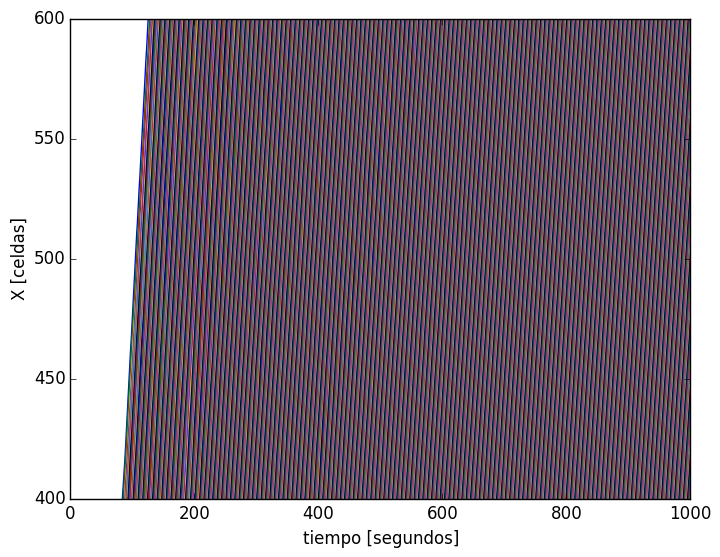

PyObject <matplotlib.text.Text object at 0x121596490>

In [7]:
# Para que esta simulación funcione habrá que asegurarse que el paquete Modelos
# ya fue importado. Este se encuentra en la primera simulación de este capítulo.

# Se muestra una pequeña simulación la cual se lleva a cabo via la función Modelo_NaSch
# Esta función acepta distintos argumentos. El primero es R tal que 0. ≤ R ≤ 1.
# El segundo es el parámetro alpha tal que 0. ≤ alpha ≤ 1.
# El tercero es la longitud de la carretera. Sólo se aceptan enteros
# El cuarto es el tiempo total. Sólo se aceptan enteros
# También hay dos argumentos extras, xlim e ylim los cuales son duplas
# y denotan los limites del diagrama dibujado

R = 0.2; alpha = 0.75; N = 1000; Tf = 1000
Modelo_Anticipacion(R, alpha, N, Tf)

## Comentarios

En un sistema de de tránsito vehicular en el cual tenemos una velocidad promedio alta (>3) el parámetro de anticipación $\alpha$ no tiene el efecto tan significativo como con sistemas de velocidades promedio bajas. Sin embargo, en el caso del primer ejemplo una distancia de seguridad baja optimiza y aumenta el flujo vehicular, llegando incluso a más de 8000 vehículos por hora [5].

En principio este tipo de sistemas podrían parecer teóricos, sin embargo las implementaciones, mejorías y resultados que están obteniendo en este momento los coches automatizados (especialmente aquellos en las carreteras de California) son alentadores para poder pensar en sistemas de este tipo, en los cuales los vehículos puedan ir uno tras otro a una gran velocidad, optimizando así las carreteras sin tener que sacrificar -*a priori*- la seguridad de los conductores.

Una vez visto la base de nuestro modelo ahora podemos extender la carretera de nuestra simulación agregándole rampas o carriles. Pasemos a construir estas implementaciones.

# Modelo de anticipación en un sistema multicarril

Si bien los modelos de carretera monocarril han tenido buenos resultados y adaptaciones a las carreteras reales y se han ajustado bien al comportamiento de estas mismas, este tipo de sistemas son únicamente una fracción de la red carretera total local o globalmente. Además, los sistemas que hasta el se momento han visto no consideran la capacidad de los vehículos de rebasar o de salir o entrar de la carretera. Este último caso lo veremos en la siguiente sección, sin embargo la habilidad de que un coche pueda rebasar otro puede ser discutida en sistemas multicarril.

El hecho de ampliar los carriles no se basa sólo en la implementación de rebasar coches, sino esencialmente en la capacidad de un coche de *cambiar* de carril por razones de seguridad u optimización. Esta habilidad vuelve mucho más rico al sistema.

Podemos decir que el poder aumentar el número de carriles e implementar la habilidad de cambiar de carril se basa en dos sencillos principios.

+ El vehículo que cambie de carril habrá de tener una *razón* para hacerlo (el vehículo de enfrente va muy lento, cambiarse a un carril preferente, regresar a un carril preferente o ir preparando una salida).
+ El cambio de carril no debe de poner en riesgo la seguridad de los conductores de ambos carriles (y por lo tanto de todos los carriles indirectamente).

A partir de estos principios podemos comenzar a idear algunas estrategias para implementar los cambios de carril.

También es importante mencionar que el aumento de carriles tiene que seguir distintas reglas.

+ El aumento de carriles no debe de poner en riesgo la dinámica ya establecida por los modelos anteriores de cada carril.
+ Los cambios de carril deben ser compuestas de reglas simples y locales (adaptada a cada carretera).
+ A partir de los datos obtenidos de los cambios de carril se puedan obtener curvas que muestren transiciones de fase con respecto a la densidad.
+ Los cambios de carril puedan mostrar fenómenos tales como la inversión de carriles cuando las reglas locales lo permitan.

Otra regla tal como que el cambio de carril no deberá permitir que los vehículos lentos (camiones) dominen la dinámica es mencionada en [5], sin embargo esto puede ser cuestionado por la simulación hecha en este trabajo. Esto será discutido más adelante. 

Antes de pasar a las reglas de cambio de carril, hay que recordar que nos encontramos en una situación donde los coches no pueden trasladarse en diagonal en el arreglo de la carretera, sino que habrán de descomponer este movimiento en uno lateral y otro frontal. ¿Cómo se genera este movimiento?

Las reglas de cambio de carril serán aplicadas antes de las 4 reglas ya vistas en nuestro modelo. En un primer tiempo los vehículos se moverán lateralmente si y sólo si las reglas de seguridad, tales como que el lugar de a lado esté disponible o que las distancias de seguridad lo permitan. 
Una vez hecho el cambio de carril entonces se aplicarán todas las reglas R1-R4 a los carriles **independientemente**. Esto quiere decir que los carriles guardan una cierta independencia para asegurar que la dinámica ya construida no se pierda. El movimiento frontarl vendrá dado entonces por R4.

Es importante mencionar que los ajustes entre este tipo de modelo multicarril con los datos empíricos no han sido muy alentadores -especialmente al insertar otros tipos de vehículos [3]-, sin embargo al implementar el parámetro de anticipación estos ajustes mejoran significativamente [5].

**Nota:** la inversión de carriles es un fenómeno que se da en un sistema en el cual el carril de extrema izquierda es preferente (carril de alta velocidad). Los vehículos entonces tenderán a colocarse en este carril, haciendo que su densidad local aumente a tal punto que la capacidad del carril sea rebasada. Paralelamente a esto, el carril de extrema derecha (carril de baja velocidad) quedará parcialmente vacío, haciendo que la densidad de este permita el circular en velocidades mayores al carril preferente. Este fenómeno ocurre en vías rápidas de paises donde se tienen este tipo de leyes (como México). En paises donde no hay preferencia de carriles y se puede rebasar por la izquierda o por la derecha (como en los Estados Unidos) este tipo de fenómenos no serán muy frecuentes.

Habrá entonces que hacer una distinción entre las diferentes reglas que hay en legislaciones locales. 

## Reglas simétricas, asimétricas y camiones

Como hemos mencionado ya anteriormente, en cada país (e incluso dentro de un mismo país) hay distintas reglas de tránsito que el conductor ha de seguir, especialmente al conducir en carretera. Regresando a los ejemplos ya mencionados, mientras que en México se le da preferencia al carril de extrema izquierda para altas velocidades y se prohibe rebasar por la derecha, en Estados Unidos estas preferencias y prohibiciones no existen. 

Estos son dos claros ejemplos de reglas de cambio de carril simétricas (Estados Unidos) y asimétricas (México). Mientras que en reglas simétricas los cambios de carril de izquierda a derecha y viceversa siguen las mismas reglas, en un régimen asimétrico cada cambio sigue sus propias reglas.

Evidentemente al analizar el caso de una carretera mexicana nuestro sistema será **asimétrico**. Sin embargo no sólo por las reglas locales de tránsito, sino también por el hecho de que la carretera no se conforma únicamente de un solo tipo de vehículo sino que encontramos también algunos vehículos lentos tales como camiones de pasajeros, camiones de carga y vehículos en malas condiciones. 

Al analizar el comportamiento de la carretera se decidió la implementación de un segundo tipo de coche lento el cual agrupará la mayoría de los ejemplos dados anteriormente. Este segundo tipo de vehículo ocupará también una única celda y tendrá como velocidad máxima $v_{max}=3$.

Los tipos de coche quedan así

+ Vehículo de tipo 1: Camiones
    
    $v_{max}=3$
    
    dimensiones: 1 celda
    
    
    
+ Vehículo de tipo 2: Coches
    
    $v_{max}=5$
    
    dimensiones: 1 celda
    
Como podemos suponer, cada uno de los dos vehículos seguirán distintas reglas al cambiar de carril.

Veamos ahora una figura en la cual nos basaremos para ideas las reglas de cambio de carril

<img src=Cambio_Carril.png align=center>
<h4 align=center> Esquema de una carretera de dos carriles para ilustrar un cambio de carril con sus respectivas medidas de seguridad.</h4>

Tomemos al vehículo con velocidad $v_i$ en el carril derecho como sujeto para realizar un cambio de carril. Este vehículo ha de tener un *incentivo* para hacer dicho cambio. En otras palabras, los vehículos no pueden cambiar de carril sólo porque sí.

Este incentivo puede ser, por ejemplo, que el coche de adelante no va lo suficientemente rápido, i.e. si $v_i < d_i^s$. Una vez que un conductor tenga este incentivo, ahora deberá de tomar algunas medidas de seguridad para realizar el cambio de carril de manera segura. 

Distinguimos dos medidas de seguridad a tomar en cuenta.

+ **Seguridad 1:** El coche de atrás no debe de ir muy rápido, evitando así una colisión con este. 

    $$d_b^s > v_b$$
    
+ **Seguridad 2:** El coche de adelante debe de estar lo suficientemente alejado

    $$d_i^s´ > v_i$$
    
    donde $d_i^s´ $ es la distancia de seguridad entre la celda a la cual se cambiaría nuestro coche y el coche de adelante
    
No falta decir que otra medida de seguridad esencial es que la celda a la cual el coche se quiera cambiar (en este caso aquella a la izquierda del vehículo) debe de estar **vacía**. Si todas estas condiciones de seguridad son cumplidas, entonces el vehículo podrá hacer un cambio de carril hacia la izquierda.

Enlistemos las reglas que habrán de seguir tantos los coches como los camiones

1- Para cualquiera de los dos tipos de vehículo está prohibido rebasar por la derecha y esta acción deberá ser realizada por la izquierda.

2 - El carril de extrema izquierda es preferente para altas velocidades. 

3 - En caso de que haya más de dos carriles, sólo aquellos dos carriles a la extrema derecha estarán disponibles para los camiones. Los camiones sólo pueden pasar a un carril fuera del de extrema derecha para rebasar. Al terminar deberán de regresar al carril de extrema derecha.

Supongamos entonces que tenemos una carretera con $k$ carriles, numerándolos de derecha a izquierda (en un sistema de dos carriles entonces $k=1$ será el carril derecho y $k=2$ será el carril izquierdo). Introduciendo esta notación y siguiendo la notación hasta ahora establecida, las reglas se ven de la siguiente manera

**Cambio de derecha a izquierda de un vehículo en el carril $k$**

+ (i) Criterio incentivo: $d_{i, k}^s > v_{i, k}$

+ (ii) Medidas de seguridad: 

   + $d_{b, k+1}^s > v_{b, k+1}$
   
   + $d_{i, k+1}^s > v_{i, k}$

   + $x_{i, k+1}$ está desocupada
                           
   Además, agregaremos que estos cambios sólo pueden ser realizados por camiones si $k=1$.
     
**Cambio de izquierda a derecha de vehículo en el carril $k$**

+ (i) Criterio incentivo: 
   
   + $ d_{i, k-1}^s > v_{i, k}$ para los dos tipos de coche.
   
   Si el vehículo es un coche, entonces agregamos que
   
   + $d_{i, k}^s > v_{i,k}$


+ (ii) Medidas de seguridad: 

   + $d_{b, k+1}^s > v_{b, k+1}$
   
   + $d_{i, k+1}^s > v_{i, k}$

   + $x_{i, k+1}$ está desocupada

Ya casi tenemos todos los elementos que necesitamos para modelar el tramo carretero que nos dedicamos a analizar. Los únicos detalles que hemos ahora de tratar son las múltiples rampas de entrada y de salida que podemos encontrar a lo largo del libramiendo de Cuernavaca, al igual que las fronteras abiertas que tenemos en nuestro caso.

# Simulando rampas de entrada, de salida y fronteras abiertas

En general las carreteras suelen tener un muy reducido números de salidas y entradas en zonas rurales (o incluso urbanas, como en el caso del segundo piso del periférico en la Ciudad de México), sin embargo hay algunos casos en los que encontramos un mayor número de rampas. Afortunadamente (¿o desafortunadamente?), el tramo carretero que nos dedicamos a analizar contiene un gran número de entradas y salidas del sistema.

Ahora bien, nuestro análisis no consiste en el sistema carretero como tal, sino únicamente el tramo en sí. Esto nos lleva únicamente a considerdar el tramo en el cual el vehículo puede desviarse para salir de la carretera, o aquel tramo en el cual un vehículo pueda entrar. Si tomamos por ejemplo una salida la cual está formada de un carril adicional, en nuestro modelo se simulará únicamente la capacidad de un vehículo de salir de la carretera durante la distancia en la cual el carril extra es añadido. 

De esta manera, cada rampa de salida y de entrada estará caracterizada por una posición inicial $x_{s/e}$ y una longitud $L_{rampa}$. También introduciremos una probabilidad $p_{s/e}$ a partir de la cual obtendremos la tasa de coches entrantes o salientes. 

## Rampas

### Rampas de salida

<img src=Rampa_Salida.png align=center>
<h4 align=center> Esquema de una rampa de salida</h4>

Como podemos observar en la figura anterior, las rampas no están modeladas por un carril extra, sino que en el tramo el cual correspondería a la rampa simulamos la opción de que un coche pueda salir o entrar. En el caso particular de unasalida, la dinámica empieza en el extremo derecho del intervalo que compone la rampa ($x_s+L_{rampa}$). A partir de ahí el programa va retrocediendo hacia $x_s$ buscando vehículos. Cada vehículo encontrado tiene una probabilidad $p$ de salir y una probabilidad $1-p$ de permanecer en la carretera.

### Rampas de entrada

<img src=Rampa_Entrada.png align=center>
<h4 align=center> Esquema de una rampa de entrada</h4>

La dinámica de una rampa de entrada es diferente a aquella de una de salida. Ahora la búsqueda no será de vehículos sino de espacios vacíos. Tampoco la búsqueda será de adelante para atrás, sino de atrás para adelante, empezando en $x_e$ y terminando en $x_e+L_{rampa}$. Una vez encontrado un espacio vacío, un vehículo será introducido con probabilidad $p$ a velocidad máxima $v_{max}$. 

Hay que recordar que en nuestra simulación tendremos dos tipos de vehículos, coches y camiones. ¿Qué tipo introducir a la carretera?
Para esto tendremos también que introducir otra probabilidad $p_{camion}$ a partir de la cual podemos introducir ya sea camiones o coches. 

Al colocar un vehículo en una rampa de entrada, este vehículo tendrá una probabilidad $p_{camion}$ de ser un camión y $1-p_{camion}$ de ser un coche. 

Como consecuencia de la introducción de estos dos parámetros probabilistas ($ \ p$ y $p_{camion}$) tendremos que en cada entrada a la carretera el número de coches insertados obedecerá $p \ (1-p_{camion})$ mientras que el número de camiones insertados obedecerá $p \ p_{camion}$. Para nuestras condiciones iniciales y  nuestros resultados será importante tener esto en cuenta.

Es importante hacer notar que el comportamiento de los vehículSios entrantes al sistema es sumamente agresivo, puesto que estos son insertados sin importar que haya un coche en la celda siguiente, en la anterior o en estas dos. Esto puede tener consecuencias importantes en la dinámica global de la carretera.

Sin embargo la dinámica de las dos tipos de rampa es realizada antes de las reglas de aceleración y desaceleración, de tal manera que los coches insertados y aquellos que estén atrás de este consideren las medidas necesarias para no provocar un accidente. 

Para conocer el detalle de las entradas y salidas del libramiento de Cuernavaca, en el Apéndice el apreciado lector encontrará una tabla general con todos los detalles de la carretera análizada y su topología. Sin embargo, todos estos detalles serán comentados en el capítulo siguiente, por lo que alentamos al lector a leerlo primero.

## Fronteras abiertas

El tramo carretero en análisis tiene fronteras abiertas puesto que estas no son periódicas. Sus fronteras tampoco tienen restricciones para que los vehículos entren o salgan, como en el caso de de casetas, retenes policiacos, etc. Un caso con fronteras abiertas con restricciones es analizado en [5] y [1] en el que el tramo carretero Cuernavaca-México es analizado. 

Puesto que en este caso no tendremos ninguna restricción, los coches podrán entrar y salir del tramo analizado sin mayor problema. 

El caso de la frontera de salida es un caso trivial puesto que todos aquellos vehículos que al moverse tengan una posición mayor a $L$ serán entonces eliminados del sistema. 

El caso de la frontera de entrada es un poco más interesante. Aquí se define la manera en la cual los coches son introducidos. Para esto habrá que construir un mini sistema en el cual los coches serán insertados a la carretera. Este sistema estará compuesto de $v_{max, 2}+1= 5+1=6$ celdas. Cada coche será introducido a la distancia más cercana al inicio de la carretera siguiendo las medidas de seguridad a velocidad máxima. 

Es decir, en el tiempo $t=0$ en el cual se introduce el primer vehículo, este será insertado en la celda $6$ de nuestro mini sistema a una velocidad $v_{max}$. Si en este primer tiempo quisieramos introducir un segundo vehículo, entonces habría que retroceder $v_{max}$ celdas para insertar este nuevo vehículo siguiendo nuestras reglas de seguridad. Esto resulta en que al insertar un camión este será colocado en la celda $3$, mientras que si insertáramos un coche, este estaría en la celda $1$. La figura siguiente esquematiza nuestro sistema total con fronteras incluidas.

<img src=Fronteras.png align=center>
<h4 align=center> Esquema del sistema total con fronteras incluídas. El sentido de tránsito es de izquierda a derecha, por lo que a la izquierda tendríamos el mini sistema en el cual los vehículos son introducidos y a la derecha la frontera de salida, sin niguna característica en especial.</h4>

Podríamos decir que en este sistema también tendremos los dos parámetros $p$ y $p_{camion}$, sólo que en este caso $p=1$ *a priori*, sin embargo si quisiéramos disminuir la intensidad del flujo entrante (horas pico/horas no pico) entonces $p$ podría cambiar de valor. 

# El modelo completo

Hasta este momento ya hemos construido y presentado cada elemento necesario y que utilizaremos en nuestro modelo para el análisis del tramo carretero del libramiento de Cuernavaca. Con el fin de reunir y resumir todo lo que hemos visto en este capítulo, a continuación haremos una pequeña recapitulación de nuestro modelo con el orden utilizado en nuestras simulaciones.

A cada paso de tiempo $t$:

+ Realizamos los cambios de carril

  En primer lugar de izquierda a derecha (los vehículos en el carril de alta velocidad tienen prioridad)
  
  En segundo lugar de derecha a izquierda


+ Insertamos en el mini sistema un coche en cada carril.


+ Realizamos la dinámica en cada una de las rampas de entrada y salida (indistintamente)

+ Aplicamos las 4 reglas del modelo modificado de NaSch con anticipación a cada uno de los vehículos en el sistema. Estas reglas son aplicadas carril por carril, empezando por el carril de baja velocidad (carril extremo derecho) hacia el de alta velocidad (carril de extrema izquierda).

  **R1** Aceleración
  
  **R2** Ruido o frenado aleatorio
  
  **R3** Desaceleración
  
  **R4** Movemos a cada uno de los vehículos

Ahora presentaremos una última simulación para que el lector pueda observar la dinámica resultante del modelo hasta ahora construido.

En la simulación tendremos una carretera con la misma longitud que las pasadas, pero ahora con dos carriles y una rampa de salida y otra de entrada. Cada una de las rampas está en el carril derecho. Las fronteras serán abiertas sin restricciones, y fijaremos $\alpha=0.75$ y $R=0.2$. De esta manera, el lector podrá jugar con los parámetros $p_s$, $p_e$ y $p_{camion}$. 

In [ ]:
# Para que esta simulación funcione, hay que importar primero los paquetes
# que se encuentran al inicio del capítulo.
# La simulación se realiza via la función ----
# el primer argumento es p_e, el segundo será p_s, 
# mientras que el tercero será p_camion.
# Los tres argumentos son 0≤ y ≤1.



El modelo hasta ahora construido nos ofrece un amplio margen de conductas y movimientos, derivando así en un comportamiento complejo y robusto. 

Mientras que las reglas de NaSch nos dan un modelo estocástico minimalista, la implementación de un parámetro de anticipación nos permite acercar el modelo a la realidad. Además de eso, todas aquellas extensiones como la adición de carriles y rampas la da una riqueza a la dinámica de los vehículos dentro de la carretera que vale la pena analizar sin siquiera tener un caso real con el cual comparar.  

Sin embargo el buscar comparar con un caso real nos obliga también a estudiar el tramo carretero objeto de análisis. Cada tramo escogido tiene distinta longitud, topología, topografía, además de rampas y algunos detalles más que puedan afectar la dinámica del sistema. Todos estos elementos habrán de ser especificidos y analizados para poder pasar a nuestras simulaciones finales. 

En el capítulo siguiente nos dedicaremos exclusivamente a conocer el libramiento de Cuernavaca, con el fin de poder adecuar correctamente nuestro modelo a él. Además, veremos también los detalles de la ampliación que el gobierno federal está realizando. 

**Falta**: 

+ Modificar las imágenes a nuestro modelo

+ Terminar las simulaciones

# Referencias

[1] del Río, J.A. Lárraga, M.E. Transient Situations in Traffic Flow: Modeling the Mexico City Cuernavaca Highway

[2] Gartner, N. Mahmassani, H. Messer, C. Lieu, H. Cunard, R. Rathy, A. Traffic Flow Theory: A State-of-the-Art Repor, monograph, Transportation Research Board Committee on Trafic Flow Theory and Characteristic (1987)

[3] Knospe, W. Santen, L. Schadschneider, A. Schreckenberg, M. A Realistic Two-lane Traffic Model for Highway Traffic. Physical Review E, 65:3369:3389 (2002).

[4] Lárraga, M.E. Un autómata celular probabilista para la simulación del tránsito de automóviles automatizados, Tesis Maestría, UNAM (2001)

[5] Lárraga, M.E. Tesis doctotal, UNAM

[6] Li, X. Wu, Q. Jiang, R. Phys. Rev. E 64:066128 1-4 (2001).

[7] Nagel, K. Schreckenberg, M. A cellular automaton model for freeway traffic, J. Phys I France 2, p 2221-2229 (1992)
